### Importing necessary modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.neighbors import NearestNeighbors
from numpy.random import uniform
from sklearn.cluster import KMeans
from random import sample


#### (Creating another dataset 'd' which does not contain solution column )

In [2]:
path = "D:\Manvi\Data_Science\Sparks_intern\iris.csv"
data = pd.read_csv(path)

data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Time to explore and understand our data

In [3]:
d=data.copy(deep=True)
d.drop(['Species','Id'],axis=1,inplace=True)
d.head(5)


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
d
d.shape

(150, 4)

In [5]:
d.describe()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
pd.isnull(d).sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
dtype: int64

### Corelation matrix to see relation between the data columns

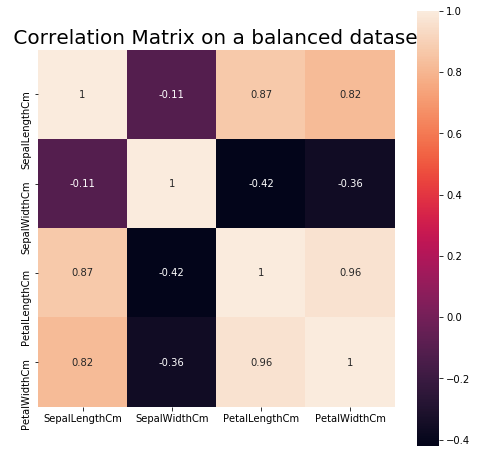

In [7]:
#Let's check if data features are related to one another

corrmat = d.corr() 
fig = plt.figure(figsize = (8, 8)) 
map=sns.heatmap(corrmat, vmax = 1, square = True,annot=True) 
map.set_title(' Correlation Matrix on a balanced dataset', fontsize=20)
plt.show()

The above clearly shows that a lot of columns are highly related 

### Running Hopkins statistics to check the likelihood of data to be clustered. 


In [8]:


def hopkins(data):
    d = data.shape[1]
    #d = len(vars) # columns
    n = len(data) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(data.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(data,axis=0),np.amax(data,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(data.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
#    if isnan(H):
#        print(ujd, wjd)
#        H = 0
 
    return H
h=hopkins(d)
print(h)

0.8219988526162161


H= 0.88 which is much greater then 0.50 and thus proves the dataset has high cluster tendency

Text(0.5, 1.0, 'Box plot for PetalWidthCm')

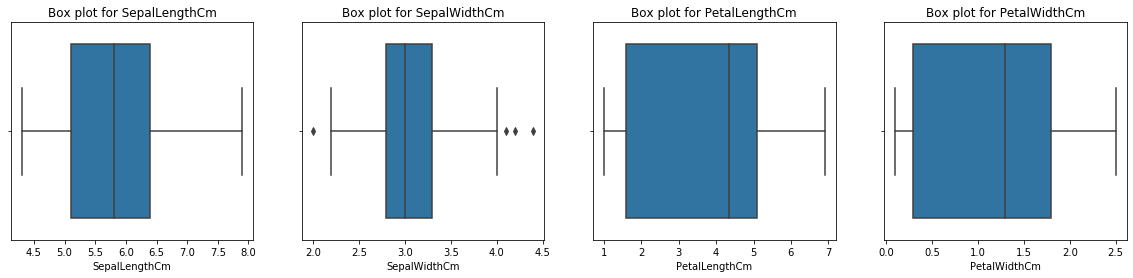

In [9]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(d['SepalLengthCm'],ax=axes[0])
axes[0].set_title('Box plot for SepalLengthCm')

sns.boxplot(d['SepalWidthCm'], ax=axes[1])
axes[1].set_title('Box plot for SepalWidthCm')

sns.boxplot(d['PetalLengthCm'], ax=axes[2])
axes[2].set_title('Box plot for PetalLengthCm')

sns.boxplot(d['PetalWidthCm'], ax=axes[3])
axes[3].set_title('Box plot for PetalWidthCm')


The above box plots show spreads of data columns and there respective percentile distributions.

#### Finding the optimum number of clusters for k-means classification


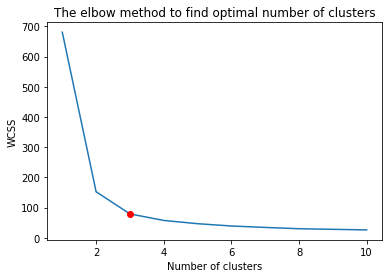

In [10]:

x = d.values

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.plot(3,wcss[2],'ro')
plt.title('The elbow method to find optimal number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()


#### Applying kmeans to the dataset / Creating the kmeans classifier


In [11]:
kmeans = KMeans(3)

y_kmeans = kmeans.fit_predict(x)

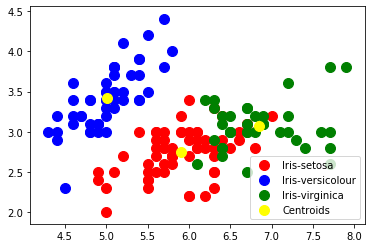

In [12]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()